<a href="https://colab.research.google.com/github/azdinelaaouissi/ML/blob/main/classification_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.exmple  classification  pour  le  dataset  titanic

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.neighbors  import KNeighborsClassifier

In [11]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Titanic-Dataset.csv",index_col="PassengerId")

In [15]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
titanic=df[["Survived","Sex","Age","Pclass"]]
titanic["Sex"].replace(["male","female"],[0,1],inplace=True)

<ipython-input-32-7c89eeb8e14a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"].replace(["male","female"],[0,1],inplace=True)


In [34]:
titanic.head()

,Survived,Sex,Age,Pclass
PassengerId,,,,
1,0,0,22.0,3
2,1,1,38.0,1
3,1,1,26.0,3
4,1,1,35.0,1
5,0,0,35.0,3


In [56]:
titanic.dropna(inplace=True)#supprime le nan

<ipython-input-56-0e9622e1a85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace=True)


In [57]:
y=titanic["Survived"]
X=titanic.drop("Survived",axis=1)

In [58]:

X

,Sex,Age,Pclass
PassengerId,,,
1,0,22.0,3
2,1,38.0,1
3,1,26.0,3
4,1,35.0,1
5,0,35.0,3
...,...,...,...
886,1,39.0,3
887,0,27.0,2
888,1,19.0,1


In [141]:
model=KNeighborsClassifier(n_neighbors=3)

In [143]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [144]:
model.score(X,y)

0.8291316526610645

In [ ]:
model.predict(X)

In [78]:
X["Pclass"].unique()

array([3, 1, 2])

In [85]:
#testiih
t1=pd.DataFrame({
    "Sex":[0],
    "Age":[26],
    "Pclass":[3]
})
t2=pd.DataFrame({
    "Sex":[1],
    "Age":[26],
    "Pclass":[2]
})
t3=pd.DataFrame({
    "Sex":[0],
    "Age":[26],
    "Pclass":[3]
})

In [88]:
print(model.predict(t1))
print(model.predict_proba(t1))
print(model.predict(t2))
print(model.predict_proba(t2))
print(model.predict(t3))
print(model.predict_proba(t3))

[0]
[[0.6 0.4]]
[1]
[[0.2 0.8]]
[0]
[[0.6 0.4]]


In [165]:
def  neighbors(X,y):
  all_score=[]
  n=1
  score=0
  for  i  in  range(n,10):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X,y)
    all_score.append(model.score(X,y))
    if score<model.score(X,y):
      score=model.score(X,y)
      n=i
  print(f"best   neighbors :{n}")
  print(all_score)
  plt.plot(all_score)




best   neighbors :4
[0.8235294117647058, 0.8221288515406162, 0.8291316526610645, 0.834733893557423, 0.8305322128851541, 0.8165266106442577, 0.8165266106442577, 0.8081232492997199, 0.8179271708683473]


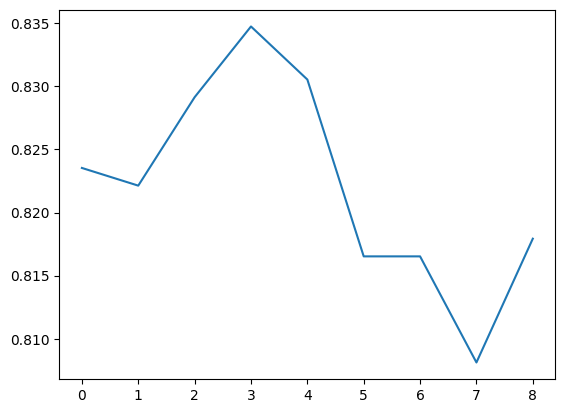

In [166]:
neighbors(X,y)